In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

C:\Users\AKSHTA\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [84]:
# Importing the data
data= pd.read_csv(r'C:\Users\AKSHTA\Desktop\Python code\Volcano.csv')
data.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [85]:
# Extracting features (X) and target variable (y)
x = data['eruptions'].values  # Using 'AP' as a single feature for simplicity
y = data['waiting'].values

#PURPOSE - PREDICTED PE ATTRIBUTE FROM MY GIVEN DATA BY IMPLEMENTING LR
# Y=PE
# X= AP
#ONE VAR

In [86]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [87]:
# Adding a column of ones for the intercept term
x_train = np.vstack((np.ones_like(x_train), x_train)).T
x_test = np.vstack((np.ones_like(x_test), x_test)).T

In [88]:
# Function to perform linear regression
#WE ARE WRITING LINEAR REGRESSION ALGORITHM

def linear_regression(X, y, learning_rate, epochs):
    m, n = X.shape
    weights = np.zeros(n)  # Initialize weights with zeros
    cost_list = []
#gradient descent
    for _ in range(epochs):
        predictions = np.dot(X, weights)
        error = predictions - y
        gradient = np.dot(X.T, error) / m
        weights -= learning_rate * gradient

        # Calculate the cost
        cost = (1/(2*m)) * np.sum(error**2)
        cost_list.append(cost)

    return weights, cost_list

In [89]:
# Train the model
learning_rate = 0.000001
epochs = 1000 # YOUR MODEL WILL GET PASS THROUGH THE DATASET 1000
weights, cost_list = linear_regression(x_train, y_train, learning_rate, epochs)
#learning rate is directly proportional to epochs

# Predict on the test set
y_pred_test = np.dot(x_test, weights)

# Calculate regression metrics

mse = np.mean((y_test - y_pred_test)**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred_test))
total_variance = np.sum((y_test - np.mean(y_test))**2)
r_squared = 1 - (mse / total_variance)


In [90]:
# Train the model
learning_rate = 0.000001
epochs = 1000 # YOUR MODEL WILL GET PASS THROUGH THE DATASET 1000
weights, cost_list = linear_regression(x_train, y_train, learning_rate, epochs)
#learning rate is directly proportional to epochs

# Predict on the test set
y_pred_test = np.dot(x_test, weights)

# Calculate regression metrics

mse = np.mean((y_test - y_pred_test)**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred_test))
total_variance = np.sum((y_test - np.mean(y_test))**2)
r_squared = 1 - (mse / total_variance)


In [91]:
# Print regression metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r_squared}")

Mean Squared Error (MSE): 5517.094697958162
Root Mean Squared Error (RMSE): 74.2771478851885
Mean Absolute Error (MAE): 73.42278729360636
R-squared: 0.23304736483379285


In [92]:
# Create a DataFrame to display actual values, predicted values, and differences
results_df = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_pred_test,
    'Difference (Actual - Predicted)': y_test - y_pred_test
})

# Print the DataFrame
print(results_df)

    Actual Values  Predicted Values  Difference (Actual - Predicted)
0              73          1.156775                        71.843225
1              50          0.655379                        49.344621
2              83          0.979782                        82.020218
3              82          1.207345                        80.792655
4              87          0.954497                        86.045503
5              86          1.316828                        84.683172
6              83          1.207345                        81.792655
7              83          0.908226                        82.091774
8              53          0.524657                        52.475343
9              82          1.173716                        80.826284
10             83          1.022008                        81.977992
11             90          1.186358                        88.813642
12             78          1.148431                        76.851569
13             70          1.10620

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

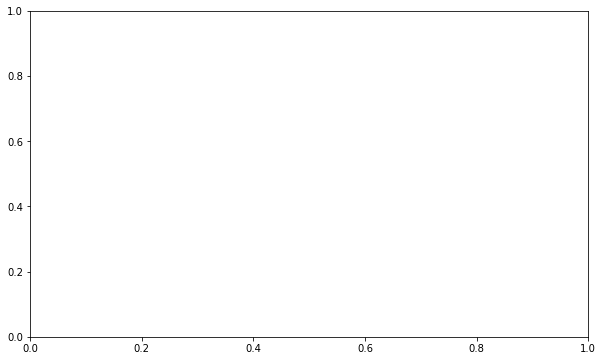

In [80]:
# Create a DataFrame
data = {
    'Actual Values': [73, 50, 83, 82, 87, 86, 83, 83, 53],
    'Predicted Values': [1.15, 0.65, 0.97, 1.20, 0.95, 1.31, 1.20, 0.90, 0.52]
}

df = pd.DataFrame(data)

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(df['Actual Values'], df['Predicted Values'], marker='o', linestyle='-', color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)

# Display the plot
plt.show()


NameError: name 'y_pred' is not defined

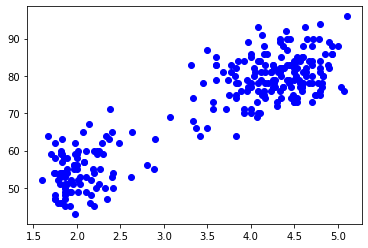

In [93]:
# Visualize the results
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Simple Linear Regression on Volcano Dataset')
plt.xlabel('Height of Volcano (m)')
plt.ylabel('Eruption Frequency')
plt.legend()
plt.show()